In [1]:
FRAME_SIZE = 150
HOP_RATIO = 0.1
N_FFT = 1024
VIGILANCE = 1.4

In [2]:
from modules.AudioProcessor import AudioProcessor

audio_files = [
    './dataset/trimmed_crowd_talking.mp3',
    './dataset/trimmed_motor_riding.mp3',
    './dataset/trimmed_water_flowing.mp3'
]
ap = AudioProcessor(
    audio_files, 
    frame_size_ms=FRAME_SIZE, 
    hop_length_ratio=HOP_RATIO
    )
print(ap.frames.shape)
print(ap.class_ids.shape)
print(ap.timestamps.shape)

torch.Size([23973, 7200])
(23973,)
(23973,)


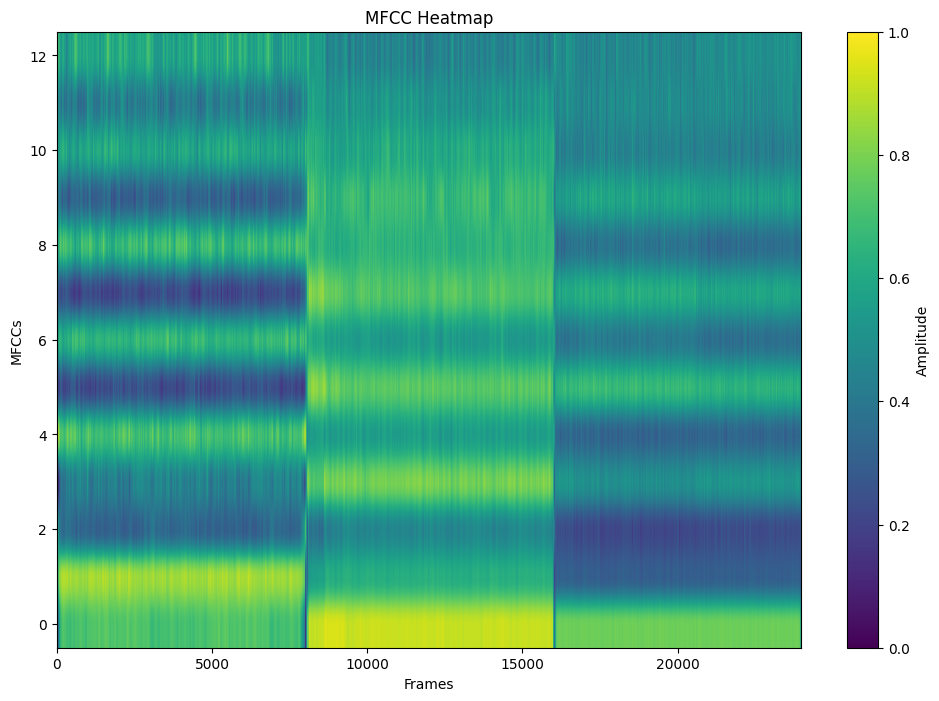

torch.Size([23973, 13])

In [3]:
from modules.FeatureExtractor import FeatureExtractor

fe = FeatureExtractor(n_fft=N_FFT)
fe.extract_mfcc(ap.frames)
fe.plot_mfccs()
fe.mfcc_features.shape

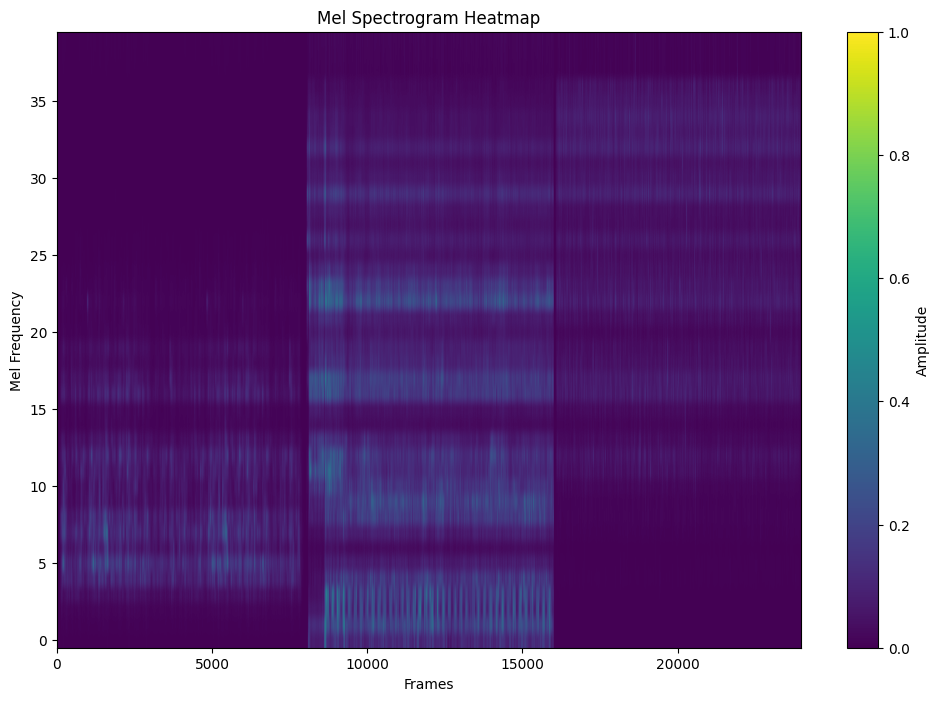

torch.Size([23973, 40])

In [4]:
fe.extract_melspectrogram(ap.frames)
fe.plot_melspectrogram()
fe.melspectrogram_features.shape

In [5]:
important_mfcc_features = [1, 3, 4, 5, 6, 7, 8, 9, 10, 11]
important_mfsc_features = [i for i in range(14)] + [i for i in range(16, 35)]

from modules.DatasetHandler import DatasetHandler

dh = DatasetHandler(
    ap.class_ids,
    ap.timestamps, 
    fe.mfcc_features, 
    fe.melspectrogram_features, 
    len(important_mfcc_features) + len(important_mfsc_features)
)
dh.generate_csv()
dh.save_selected_features(important_mfcc_features, important_mfsc_features)

time_series_tensor = dh.generate_time_series(FRAME_SIZE, HOP_RATIO)
time_series_tensor.shape

torch.Size([5, 8000, 43])

/Users/kennanwu/Documents/projects/online-clustering/modules/ART2Clusterer.py:31: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.df = pd.concat([self.df, pd.DataFrame([data])], ignore_index=True)


[[   0 2628    0    0    0    0    0    0    0    0    1]
 [ 389   12 2037  230    0    6    0    1    0    1    0]
 [2681    3    0    0    7    1    2    0    1    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0]]
0.91825


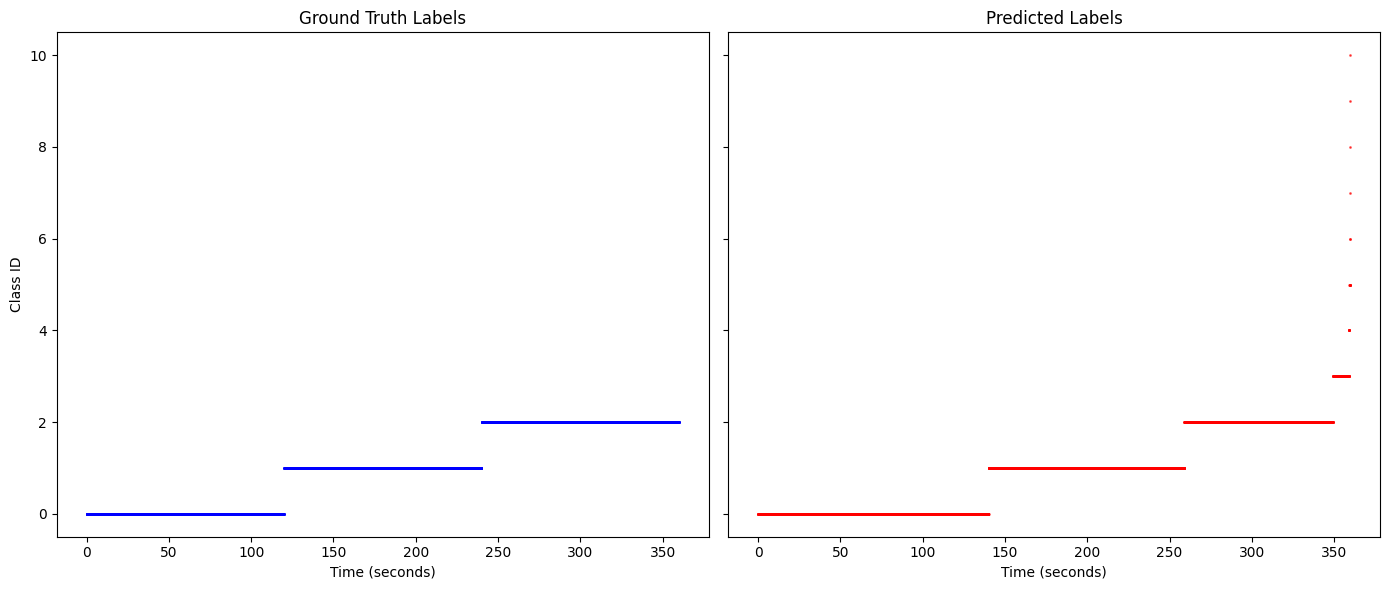

/Users/kennanwu/Documents/projects/online-clustering/modules/ART2Clusterer.py:31: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.df = pd.concat([self.df, pd.DataFrame([data])], ignore_index=True)


[[   0 2678    0    0    0    0    0    0    0]
 [ 290   11    0 2299    0    0    0    4    0]
 [2705    3    5    0    1    1    1    1    1]
 [   0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0]]
0.96025


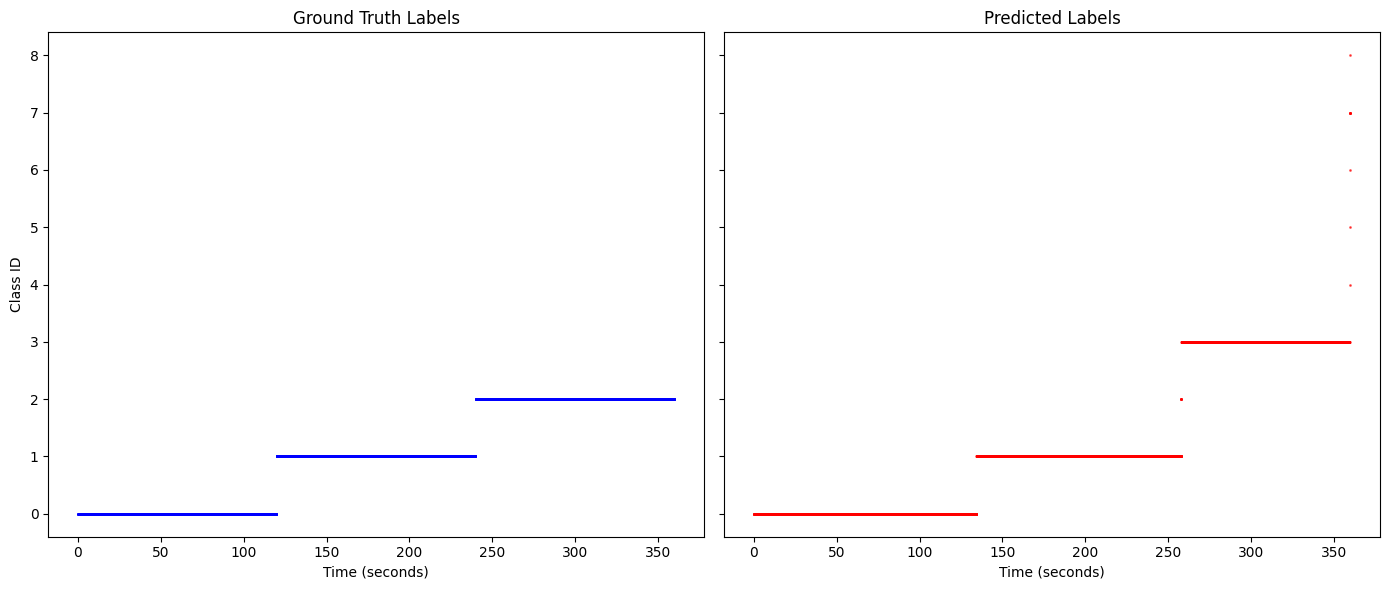

/Users/kennanwu/Documents/projects/online-clustering/modules/ART2Clusterer.py:31: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.df = pd.concat([self.df, pd.DataFrame([data])], ignore_index=True)


[[1028    0    0    0    0 1652    0    1    0    0]
 [ 104    4 2530    4    0    0    0    0    0    0]
 [ 969 1699    4    0    2    0    1    0    1    1]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]]
0.735125


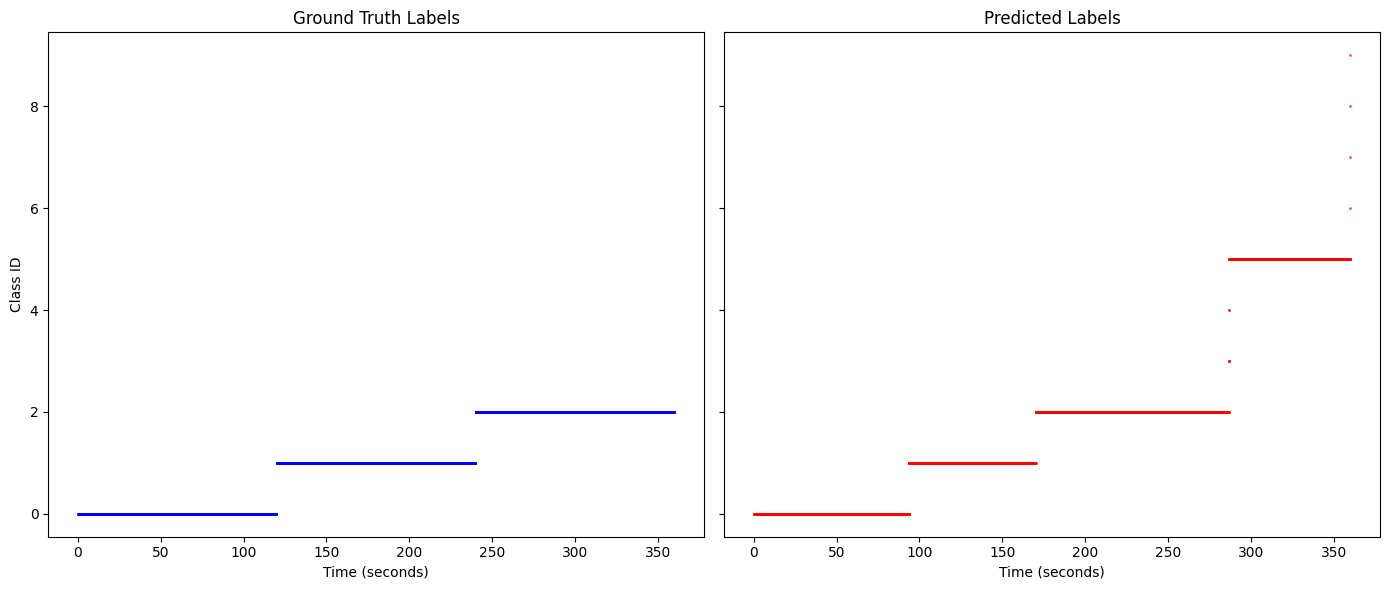

/Users/kennanwu/Documents/projects/online-clustering/modules/ART2Clusterer.py:31: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.df = pd.concat([self.df, pd.DataFrame([data])], ignore_index=True)


[[   0 2727    0    0    0    0    2    0    0    0]
 [  98   14 2413    2    0   15    0    0    0   88]
 [2615    2    0   16    1    0    0    5    2    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]]
0.969375


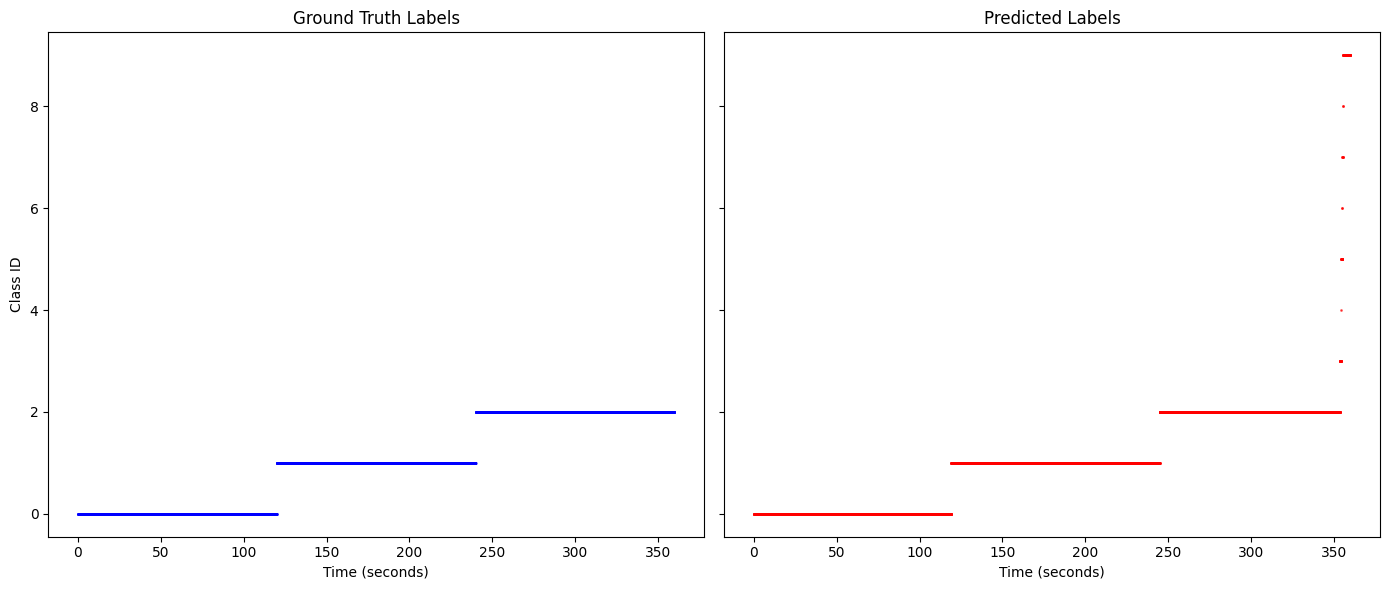

/Users/kennanwu/Documents/projects/online-clustering/modules/ART2Clusterer.py:31: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.df = pd.concat([self.df, pd.DataFrame([data])], ignore_index=True)


[[2677    0    0    0    0    0]
 [  56 2638    7    0    1    0]
 [ 518    0 2101    1    0    1]
 [   0    0    0    0    0    0]
 [   0    0    0    0    0    0]
 [   0    0    0    0    0    0]]
0.927


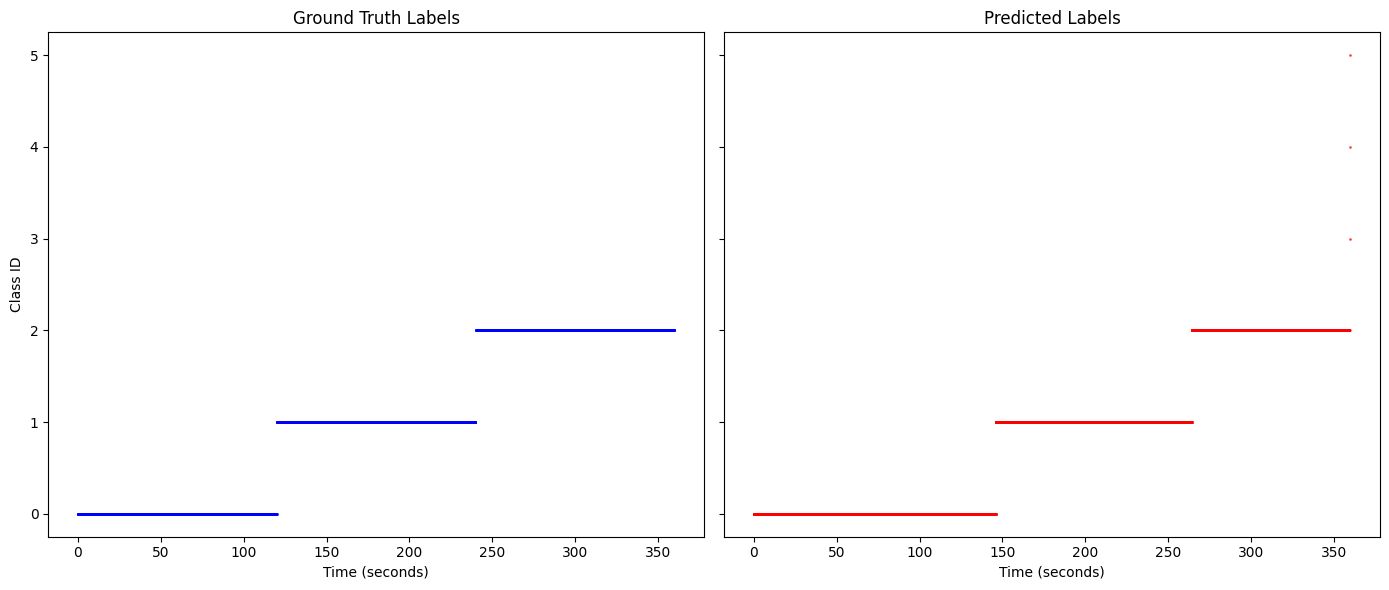

In [9]:
import importlib
import modules.ART2Clusterer
importlib.reload(modules.ART2Clusterer)
from modules.ART2Clusterer import ART2Clusterer
import pandas as pd

for i in range(5):
    df = pd.read_csv(f'output/ground_truth_{i}.csv')
    clusterer = ART2Clusterer(
        vigilance=VIGILANCE, 
        n_features=time_series_tensor.shape[2],
        time_series_index=0
    )
    for index, row in df.iterrows():
        clusterer.fit_clusters(row)

    clusterer.write_to_csv()
    conf_matrix, acc = clusterer.calc_accuracy()
    print(conf_matrix)
    print(acc)
    clusterer.plot_truth_vs_time()